# CDP: Unlocking Climate Solutions

####  By Gilad Shtern 27-Nov-2020

### Introduction
CDP is a global non-profit that drives companies and governments to reduce their greenhouse gas emissions, safeguard water resources, and protect forests. Each year, CDP takes the information supplied in its annual reporting process and scores companies and cities based on their journey through disclosure and towards environmental leadership.

CDP houses the world’s largest, most comprehensive dataset on environmental action. As the data grows to include thousands more companies and cities each year, there is increasing potential for the data to be utilized in impactful ways. Because of this potential, CDP is excited to launch an analytics challenge for the Kaggle community. Data scientists will scour environmental information provided to CDP by disclosing companies and cities, searching for solutions to our most pressing problems related to climate change, water security, deforestation, and social inequity.

How do you help cities adapt to a rapidly changing climate amidst a global pandemic, but do it in a way that is socially equitable?

What are the projects that can be invested in that will help pull cities out of a recession, mitigate climate issues, but not perpetuate racial/social inequities?

What are the practical and actionable points where city and corporate ambition join, i.e. where do cities have problems that corporations affected by those problems could solve, and vice versa?

How can we measure the intersection between environmental risks and social equity, as a contributor to resiliency?

### PROBLEM STATEMENT
Develop a methodology for calculating key performance indicators (KPIs) that relate to the environmental and social issues that are discussed in the CDP survey data. Leverage external data sources and thoroughly discuss the intersection between environmental issues and social issues. Mine information to create automated insight generation demonstrating whether city and corporate ambitions take these factors into account.



## Part1 - Data Exploration for Cities Responses Questionnaires

In [1]:
#Step1 - Aggregate csv by csv subject
import pandas as pd
import os
import nbconvert
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore');

path = 'G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/'
folderList = ['G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/Cities/Cities Responses',
'G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Climate Change',
'G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Water Security']
for i, valueA in enumerate(folderList):
    filesList = os.listdir(valueA)[0:3]
    for j, valueB in enumerate(filesList):
        df = pd.read_csv(valueA + "/" + valueB)
        if j == 0:
            df0 = df
        else:
            #df0 = pd.concat([df0,df], axis=1)
            df0 = df0.append(df)

    if len(valueA.split("/")) == 5:
        newFilePath = path + valueA.split("/")[4] + ".csv"
    else:
        newFilePath = path + valueA.split("/")[4] + " " + valueA.split("/")[5].split(" ")[0] + ".csv"
    df0.to_csv(newFilePath , index=False, sep=',', header=True)

In [2]:
#Step2 - Load cities aggregate responses
Cities_Responses_df = pd.read_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/Cities Responses.csv')
Cities_Responses_df.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,CDP Cities 2018,2018,3203,City of Chicago,United States of America,North America,Water,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN,NaN,NaN,24/06/2020 05:28:18 AM
1,CDP Cities 2018,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High,NaN,NaN,24/06/2020 05:28:18 AM
2,CDP Cities 2018,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation,NaN,NaN,24/06/2020 05:28:18 AM
3,CDP Cities 2018,2018,36522,Comune di Verbania,Italy,Europe,Strategy,Energy,9.0,Please indicate the energy mix of electricity ...,2,Gas,1,Energy consumption percentage,NaN,NaN,NaN,24/06/2020 05:28:18 AM
4,CDP Cities 2018,2018,35873,Municipality of Medellín,Colombia,Latin America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,3,Magnitude of impact,6,NaN,Serious,NaN,NaN,24/06/2020 05:28:18 AM


In [3]:
#Step3 - Check col types, NA, unique.
df = pd.DataFrame(columns = ['Col', 'Type', 'NA', '%NA', 'UniqLen']) 
colList = list(Cities_Responses_df)

for i, value in enumerate(colList):
    df.loc[i] = [value, Cities_Responses_df.dtypes[i], Cities_Responses_df[value].isna().sum(),  Cities_Responses_df[value].isna().sum()/len(Cities_Responses_df), len(Cities_Responses_df[value].unique())]

df

,Col,Type,NA,%NA,UniqLen
0,Questionnaire,object,0,0.000000,3
1,Year Reported to CDP,int64,0,0.000000,3
2,Account Number,int64,0,0.000000,975
3,Organization,object,0,0.000000,976
4,Country,object,0,0.000000,94
5,CDP Region,object,0,0.000000,8
6,Parent Section,object,274302,0.177830,21
7,Section,object,0,0.000000,51
8,Question Number,object,0,0.000000,259
9,Question Name,object,0,0.000000,329


In [4]:
#Step4 - Handle column
#Convert Last Update into year & month
Cities_Responses_df['ResYear'] = int(Cities_Responses_df['Last update'][1].split("/")[2].split(" ")[0])
Cities_Responses_df['ResMonth'] = int(Cities_Responses_df['Last update'][1].split("/")[1])

#Convert col type:int64 -> int 32
for i, value in enumerate(colList):
    if Cities_Responses_df.dtypes[i] == 'int64' or Cities_Responses_df.dtypes[i] == 'float64':
        Cities_Responses_df[value] = Cities_Responses_df[value].astype('int32')

#Drop NA cols
Cities_Responses_df = Cities_Responses_df.drop(['Questionnaire', 'Parent Section', 'Comments', 'File Name', 'Column Name','Row Name', 'Last update'], axis=1)

#Drop specific row in which Response Answer col is NaN
Cities_Responses_df = Cities_Responses_df.dropna(subset = ['Response Answer'])
Cities_Responses_df.head()

,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Section,Question Number,Question Name,Column Number,Row Number,Response Answer,ResYear,ResMonth
1,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,4,Medium High,2020,6
2,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,3,On-site renewable energy generation,2020,6
4,2018,35873,Municipality of Medellín,Colombia,Latin America,Climate Hazards,2.2a,Please list the most significant climate hazar...,3,6,Serious,2020,6
6,2018,31155,City of Buenos Aires,Argentina,Latin America,Re-stating previous emissions inventories,7.13a,Please provide your city’s recalculated total ...,4,2,13434140,2020,6
7,2018,59653,"City of Manhattan Beach, CA",United States of America,North America,GHG Emissions Data,7.11,Please indicate if your city-wide emissions ha...,3,1,Improvement in electricity grid renewable ener...,2020,6


### Part2 - Analyze cities questionnaires to find KPIs questions 

In this part, I will try to analyze cities responses questionnaires to find which question are most likely to be related with climate issues by using NLP. at the end of this part, we can assume to keep with clean dataset.

In [5]:
#Step5 - Question NLP check
#Create empty DF: Question Number, Question Name, Question Keywords, Climate Keywords
cities_keywords_df = pd.DataFrame(columns=['Question Number', 'Question Name', 'Question Keywords', 'Climate Keywords'])

#Keep unique questions for NLP check
cities_keywords_df['Question Number'] = Cities_Responses_df['Question Number']
cities_keywords_df['Question Name'] = Cities_Responses_df['Question Name']
cities_keywords_df['Question Keywords'] = ''
cities_keywords_df['Climate Keywords'] = ''

cities_keywords_df = cities_keywords_df.drop_duplicates(subset=['Question Number', 'Question Name'], keep="first")
cities_keywords_df.head()

#NLP
from nltk.tokenize import sent_tokenize
import nltk
en_stop = set(nltk.corpus.stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
import re

stemmer = WordNetLemmatizer()
#Preprocess func
def preprocess_text(document):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(document))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    tokens = document.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in en_stop]
    tokens = [word for word in tokens if len(word) > 3]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

for i, value in enumerate(cities_keywords_df['Question Name']):
    text = sent_tokenize(str(value))
    cities_keywords_df['Question Keywords'].iloc[i] = preprocess_text(text)
    
cities_keywords_df.head()

#Create list of climate/pollusion dictionary
climate_change_keywords = ['carbon', 'dioxide', 'greenhouse', 'ghg', 'co2', 'emissions', 'extreme weather', 'global warming', 'climate change', 'fossil fuels','sea-level rise', 'global average temperature', 'renewable energy', 'methane', 'atmosphere', 'melt', 'waste', 'smoke', 'smog', 'sulfur', 'nitrates', 'harmful', 'hazard', 'fire', 'damage', 'acid']

#Check if col keyword contains climate/Greenhouse  keywords
for i in range(0, len(cities_keywords_df)):
    question_keywords = list(cities_keywords_df['Question Keywords'].iloc[i].split(" "))
    counter = 0
    for j, value in enumerate(question_keywords):
        try: 
            climate_change_keywords.index(value)
            counter += 1
            cities_keywords_df['Climate Keywords'].iloc[i] = counter
            
        except:
            {}

cities_keywords_df.to_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/cities_keywords_df.csv', index=False)
cities_keywords_df.head()

,Question Number,Question Name,Question Keywords,Climate Keywords
1,2.2a,Please list the most significant climate hazar...,please list significant climate hazard faced c...,3
2,8.4,What actions is your city taking to reduce emi...,action city taking reduce emission please also...,
6,7.13a,Please provide your city’s recalculated total ...,please provide city recalculated total city wi...,
7,7.11,Please indicate if your city-wide emissions ha...,please indicate city wide emission increased d...,
10,1.2,Please describe the administrative structure o...,please describe administrative structure gover...,


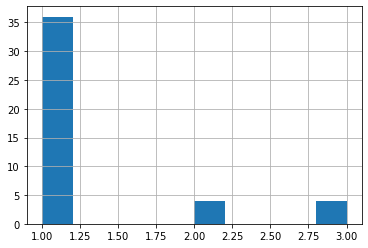

In [6]:
#Step6 - find Cities KPI impact questions
cities_keywords_df['Climate Keywords'] = pd.to_numeric(cities_keywords_df['Climate Keywords'])
cities_keywords_df['Climate Keywords'].hist()

Upon the above analysis, we can distinguish between question that contain less than at least 2 climate/greenhouse keywords with those that have more than 2 climate greenhouse keywords.
Hence, we should remove all non significant questions from the cities aggregate responses.

In [7]:
#Step7 - Clean Cities Responses dataset
#Keep question numbers list for remove
remove_question_df = cities_keywords_df[cities_keywords_df['Climate Keywords'] <2]
remove_question_list = list(remove_question_df['Question Number'])

for i, value in enumerate(remove_question_list):
    Cities_Responses_df = Cities_Responses_df[Cities_Responses_df['Question Number'] != value]
    
Cities_Responses_df.to_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/cities_responses_clean_df.csv', index=False)

### Part3 - Analyze climate impact keywords in matrix answers

Now, that we left with clean dataset in which contains climate KPI questions. We need to allocate climate impact answers.
However, our answers are build in a non formal matrix way. In regular rectangle matrix, our celss would be N*M. But on this questionnaires asnwers could be found with a diferent row number per a column; col A may have 3 rows, while col D may have 5 rows.
Let raise up our assumptions:
-  Assumption1: Most cities answer won't have any climate keywords.
-  Assumption2: By, contrast, sensitive climate cities will have climate keywords.

Once again, I will use NLP analysis.

In [8]:
#Step8 - Clean answers for calc answer matrix
Cities_Responses_df = pd.read_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/cities_responses_clean_df.csv')

#Add col clean text
Cities_Responses_df['Answer Keywords'] = ''

#Insert clean text into col
for i in range(0, len(Cities_Responses_df)):
    text = sent_tokenize(Cities_Responses_df['Response Answer'].iloc[i])
    Cities_Responses_df['Answer Keywords'].iloc[i] = preprocess_text(text)


In [9]:
#Step9 - Calc most climate impact answer cells
#Create answer keywords col
Cities_Responses_df['Climate Keywords'] = ''

#Create list of climate/pollusion keywords
climate_change_keywords = ['carbon', 'dioxide', 'greenhouse', 'ghg', 'co2', 'emissions', 'extreme weather', 'global warming', 'climate change', 'fossil fuels','sea-level rise', 'global average temperature', 'renewable energy', 'methane', 'atmosphere', 'melt', 'waste', 'smoke', 'smog', 'sulfur', 'nitrates', 'harmful', 'hazard', 'fire', 'damage', 'acid']

#Check if col keyword contains climate/pollusion/Greenhouse
for i in range(0, len(Cities_Responses_df)):
    question_keywords = list(str(Cities_Responses_df['Answer Keywords'].iloc[i]).split(" "))
    counter = 0
    for j, value in enumerate(question_keywords):
        try:
            climate_change_keywords.index(value)
            counter += 1
        except:
            {}
    Cities_Responses_df['Climate Keywords'].iloc[i] = counter

Cities_Responses_df = Cities_Responses_df.drop(['Question Name', 'Response Answer', 'Answer Keywords'], axis=1)
Cities_Responses_df['FullAnswerID'] = Cities_Responses_df['Question Number'] + "." + Cities_Responses_df['Column Number'].map(str) + "." + Cities_Responses_df['Row Number'].map(str)
Cities_Responses_df.to_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/cities_responses_clean_df1.csv', index=False)

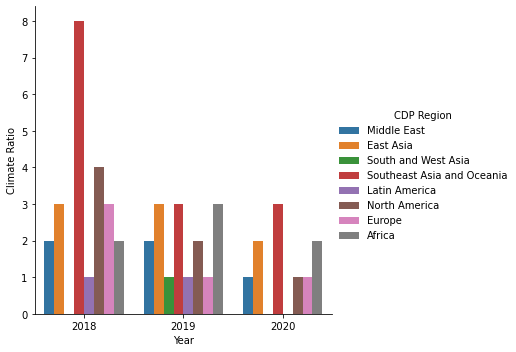

In [10]:
#Step10 - Display year trend by region as factor climate keywords
Cities_Responses_clean_df = pd.read_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/cities_responses_clean_df1.csv')
Cities_Responses_orig_df = pd.read_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/Cities Responses.csv')
RegionClimateByYearDF = pd.DataFrame(columns=['CDP Region', 'Year', 'Climate Ratio'])
CDPRegionList = set(Cities_Responses_clean_df['CDP Region'])
YearList = [2018, 2019, 2020]
k = 0
for i, valueA in enumerate(CDPRegionList):
    for j, valueB in enumerate(YearList):
        df0 = Cities_Responses_orig_df[Cities_Responses_orig_df['CDP Region'] == valueA]
        df1 = Cities_Responses_clean_df[Cities_Responses_clean_df['CDP Region'] == valueA]
        df0 = df0[df0['Year Reported to CDP'] == valueB]
        df1 = df1[df1['Year Reported to CDP'] == valueB]
        RegionClimateByYearDF.loc[k] = [valueA, valueB, int(df1['Climate Keywords'].sum()/len(df0) * 100)]
        k += 1

sns.catplot(x="Year", y="Climate Ratio", hue="CDP Region", kind="bar", data=RegionClimateByYearDF)

In the above graph, we see climate ratio trend by CDP regions & years. As example, Southeast Asis & Oceania climate keyword ration was reduced fromm 8% to 3% between 2018 to 2019. Also, North America reduced from 4% to 1%.

### Part4 - Build A Model

At this point, we can build an classification problem ML model. As prepare, dataset should be convert into numeric. Then, we will compare between models & choose one.

In [11]:
#Step11 - Dictionary
dic = {}
objList = []
colList = list(Cities_Responses_clean_df)
#Create list of all object col
for i, value in enumerate(colList):
    #Per each object col, find unique values and add into list.
    if Cities_Responses_clean_df[value].dtype == 'object':
        objList += list(Cities_Responses_clean_df[value].unique())

#Remove duplicate from list and 'nan'
objList = list(set(objList))

#Build dic with values
for i, value in enumerate(objList):
    dic[value] = (i + 3) * 4 - 1
    #Go over dic and replace strings into numeric
    Cities_Responses_clean_df= Cities_Responses_clean_df.replace(value, dic[value])

for i in range(0, len(Cities_Responses_clean_df)):
    if Cities_Responses_clean_df['Climate Keywords'].iloc[i] > 0:
        Cities_Responses_clean_df['Climate Keywords'].iloc[i] = 1

#Save dic
import pickle
file_to_write = open("G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/dic.pickle", "wb")
pickle.dump(dic, file_to_write)
#Save df
Cities_Responses_clean_df.to_csv('G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/cities_convert_numeric.csv', index=False)

In [12]:
#Step12 - ML PycCaret
from pycaret.classification import *

exp1 = setup(Cities_Responses_clean_df, target = 'Climate Keywords')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(881739, 13)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
#Step13 - Model comparision
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.978000,0.949200,0.139900,0.756800,0.236100,0.230200
1,Light Gradient Boosting Machine,0.977400,0.940000,0.091700,0.830500,0.165100,0.161000
2,Gradient Boosting Classifier,0.976400,0.873600,0.037000,0.873300,0.070900,0.069100
3,Extreme Gradient Boosting,0.976100,0.870600,0.019100,0.958400,0.037400,0.036500
4,Random Forest Classifier,0.976000,0.804700,0.176000,0.519100,0.262800,0.253600
5,Ada Boost Classifier,0.975800,0.819600,0.013800,0.643000,0.027000,0.025900
6,Logistic Regression,0.975700,0.568800,0.004800,0.427800,0.009500,0.009000
7,Ridge Classifier,0.975700,0.000000,0.002100,0.474000,0.004100,0.003900
8,Extra Trees Classifier,0.975000,0.837700,0.206700,0.468000,0.286700,0.275900
9,K Neighbors Classifier,0.974500,0.660400,0.039100,0.307700,0.069400,0.064200


In [17]:
#Step14 -  train logistic regression model
lgbms = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9774,0.9392,0.0962,0.8025,0.1717,0.1674
1,0.9775,0.9378,0.0932,0.8289,0.1676,0.1634
2,0.9777,0.9443,0.0947,0.8951,0.1712,0.1674
3,0.9776,0.9388,0.1021,0.8214,0.1816,0.1772
4,0.9773,0.9428,0.0858,0.8227,0.1554,0.1515
5,0.9776,0.9384,0.1021,0.8313,0.1818,0.1774
6,0.9774,0.9404,0.0851,0.8456,0.1546,0.1508
7,0.9771,0.9353,0.0769,0.8062,0.1404,0.1368
8,0.9773,0.9395,0.0902,0.8026,0.1622,0.1581
9,0.9775,0.9433,0.0910,0.8483,0.1643,0.1604


In [18]:
save_experiment(experiment_name = 'G:/DataScienceProject/Kaggle_cdp-unlocking-climate-solutions/Exp1')

Experiment Succesfully Saved


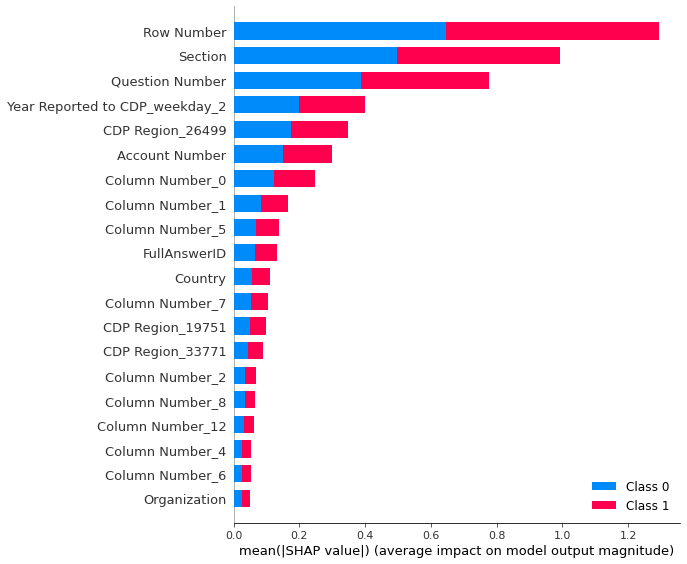

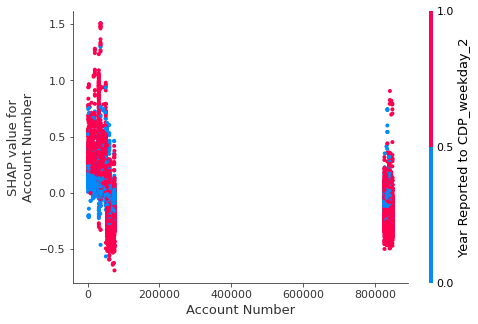

In [20]:
# summary plot
interpret_model(lgbms)
# correlation plot
interpret_model(lgbms, plot = 'correlation')

### Conclussion

To summarize the answer for develop a methode for calculate KPIs that relate to the environmental and social issues that are discussed in the CDP survey data, we van suggest the followed:
- Find KPI question from the qyestionnaires by use of NLP.
- Use Light Gradient Boosting Machine model analyze the answers. Main KPI's: row number, section & question number.

Enjoy,
Gilad